In [1]:
## import dependencies 
import tensorflow as tf
import numpy as np 
import pandas as pd 
from datetime import datetime, date, time
import os 
import glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from matplotlib.dates import DateFormatter

date_form = DateFormatter("%m-%d")

In [2]:
## importing dependencies 
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS 

## define influxdb paramters
token = "A1hvR7pmPINW66Wuxbb7dpwR74TukBJIC7IuP3ADhr4xTx0Zzx-JZxzgInUUFbikMsg_bNo2TI4QnbXnUIOkDg=="
org = "ThirdYearProject"
bucket = "de75cd94d8127ada"

## connect to influxdb
client = InfluxDBClient(url="http://localhost:8086", token=token, org=org)

In [6]:
## query data

query_api = client.query_api()

query1 = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1304" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query2 = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-04-25T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1305" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query3 = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-07-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1306" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query4 = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1307" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

def dataReady(query):
    data = query_api.query_data_frame(query)
    data.set_index("_time", inplace=True)
    data.index = pd.to_datetime(data.index)
    data.drop('result', axis=1, inplace=True)
    data.drop('table', axis=1, inplace=True)
    return data

data1 = dataReady(query1)
data2 = dataReady(query2)
data3 = dataReady(query3)
data4 = dataReady(query4)

        result  table                     _time  Q-Factor
0      _result      0 2015-05-10 00:00:00+00:00     12.72
1      _result      0 2015-05-10 00:15:00+00:00     12.71
2      _result      0 2015-05-10 00:30:00+00:00     12.68
3      _result      0 2015-05-10 00:45:00+00:00     12.68
4      _result      0 2015-05-10 01:00:00+00:00     12.69
...        ...    ...                       ...       ...
12439  _result      0 2015-11-01 10:45:00+00:00     12.51
12440  _result      0 2015-11-01 11:00:00+00:00     12.54
12441  _result      0 2015-11-01 11:15:00+00:00     12.53
12442  _result      0 2015-11-01 11:30:00+00:00     12.54
12443  _result      0 2015-11-01 11:45:00+00:00     12.54

[12444 rows x 4 columns]
        result  table                     _time  Q-Factor
0      _result      0 2015-05-10 00:00:00+00:00     12.62
1      _result      0 2015-05-10 00:15:00+00:00     12.64
2      _result      0 2015-05-10 00:30:00+00:00     12.63
3      _result      0 2015-05-10 00:45:00+00:0

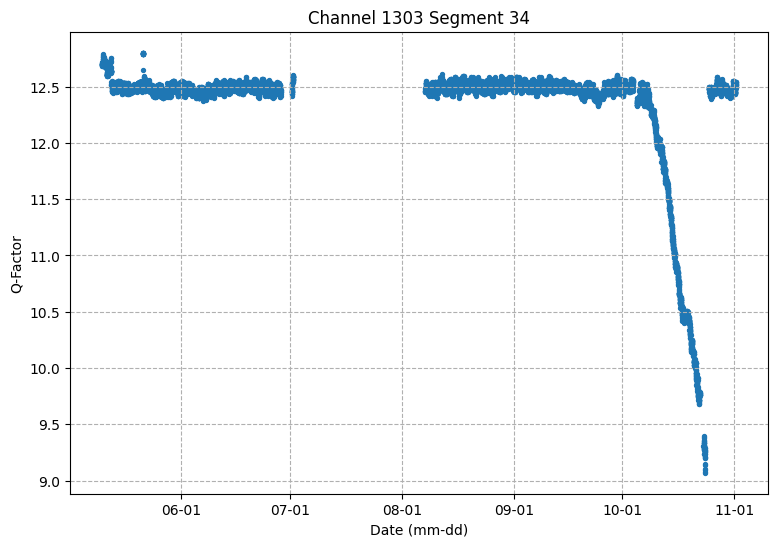

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12444 entries, 2015-05-10 00:00:00+00:00 to 2015-11-01 11:45:00+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-Factor  12444 non-null  float64
dtypes: float64(1)
memory usage: 194.4 KB


In [7]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(data1.index.values, data1['Q-Factor'], s=8)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1303 Segment 34')
plt.show()

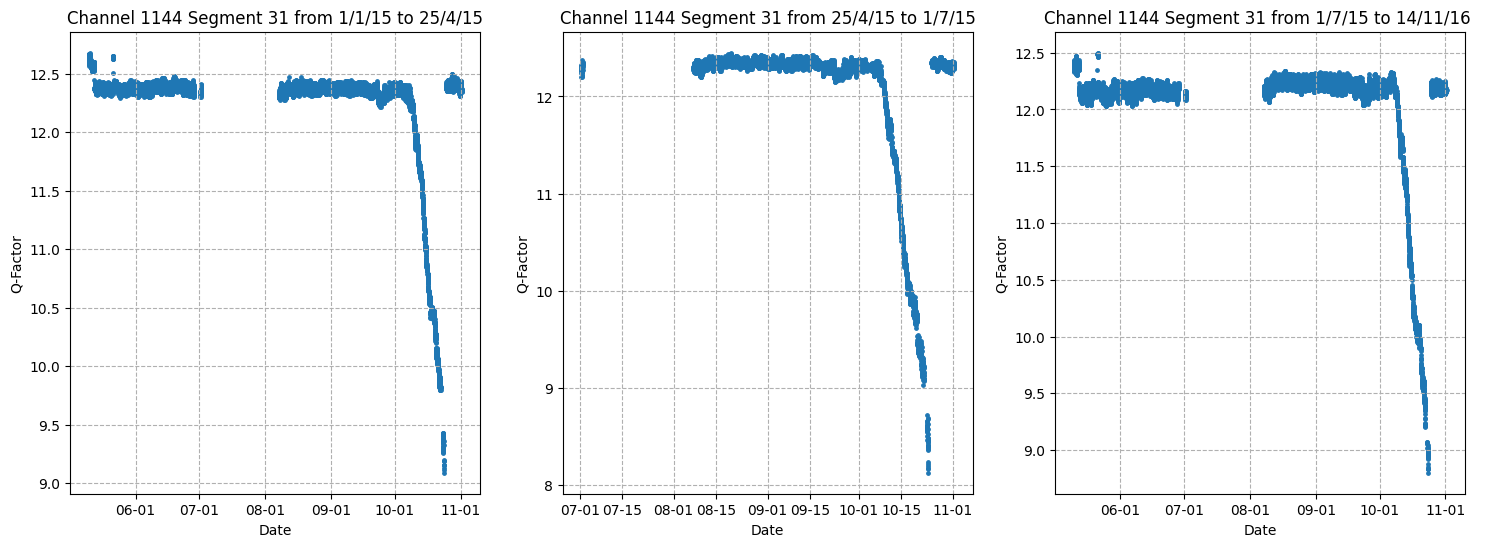

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
ax1.scatter(data2.index.values, data2['Q-Factor'],s=6)
ax1.set(xlabel="Date", ylabel="Q-Factor")
ax1.xaxis.set_major_formatter(date_form)
ax1.grid(linestyle="--")
ax1.set_title('Channel 1144 Segment 31 from 1/1/15 to 25/4/15')
ax2.scatter(data3.index.values, data3['Q-Factor'],s=6)
ax2.set(xlabel="Date", ylabel="Q-Factor")
ax2.xaxis.set_major_formatter(date_form)
ax2.grid(linestyle="--")
ax2.set_title('Channel 1144 Segment 31 from 25/4/15 to 1/7/15')
ax3.scatter(data4.index.values, data4['Q-Factor'],s=6)
ax3.set(xlabel="Date", ylabel="Q-Factor")
ax3.xaxis.set_major_formatter(date_form)
ax3.grid(linestyle="--")
ax3.set_title('Channel 1144 Segment 31 from 1/7/15 to 14/11/16 ')
plt.show()

In [10]:
#fig,  = plt.subplots(figsize=(8,5))
#ax.scatter(data3.index.values, data3['Q-Factor'], s=8)
#ax.set(xlabel="Date", ylabel="Q-Factor")
#ax.xaxis.set_major_formatter(date_form)
#ax.grid(linestyle="--")
#ax.set_title('Channel 1144 Segment 31 from 25/4/15 to 1/7/15')
#plt.show()

In [11]:
#fig, ax = plt.subplots(figsize=(8,5))
#ax.scatter(data4.index.values, data4['Q-Factor'], s=8)
#ax.set(xlabel="Date", ylabel="Q-Factor")
#ax.xaxis.set_major_formatter(date_form)
#ax.grid(linestyle="--")
#ax.set_title('Channel 1144 Segment 31 from 1/8/15 to 14/11/16 ')
#plt.show()

In [12]:
adfuller(data1)

(-3.308688112088599,
 0.014494554301443148,
 2,
 12441,
 {'1%': -3.4308757334427824,
  '5%': -2.861772347929028,
  '10%': -2.5668936738032078},
 -45792.06794701003)

In [13]:
adfuller(data2)

(-3.2291612956224216,
 0.018357556000070614,
 10,
 12433,
 {'1%': -3.4308760717952618,
  '5%': -2.8617724974506835,
  '10%': -2.5668937533926637},
 -46836.23161146733)

In [14]:
adfuller(data3)

(-2.5373831710415913,
 0.1066414674471508,
 17,
 7766,
 {'1%': -3.4311923207301245,
  '5%': -2.8619122438656848,
  '10%': -2.566968140832458},
 -23170.456674948968)

In [15]:
adfuller(data4)

(-3.0824946639990003,
 0.02787607809648825,
 7,
 12436,
 {'1%': -3.4308759448620574,
  '5%': -2.8617724413575165,
  '10%': -2.566893723534616},
 -45031.480099630644)